<a href="https://colab.research.google.com/github/saumyamishra1211/saumyamishra1211/blob/main/Logistic_Regression_on_Diabetes_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Data handeling and manipulation libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


In [ ]:
#Read the data
df = pd.read_csv('pima-indians-diabetes_label (2).csv')

In [ ]:
# Encoded- categorical into numerical
# yes/no - yes 1, no 0

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Target Variable- Outcome
- Problem statement- You have to build the ML model which will predict the outcome of a diabetes.
- 1- person has diabetes
- 0- person does not has diabetes

In [ ]:
sorted(df.columns)

['Age',
 'BMI',
 'BloodPressure',
 'DiabetesPedigreeF',
 'Glucose',
 'Insulin',
 'Outcome',
 'Pregnancies',
 'SkinThickness']

## EDA(Exploratory Data Analysis)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnancies        768 non-null    int64  
 1   Glucose            768 non-null    int64  
 2   BloodPressure      768 non-null    int64  
 3   SkinThickness      768 non-null    int64  
 4   Insulin            768 non-null    int64  
 5   BMI                768 non-null    float64
 6   DiabetesPedigreeF  768 non-null    float64
 7   Age                768 non-null    int64  
 8   Outcome            768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeF,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.skew()

Pregnancies          0.901674
Glucose              0.173754
BloodPressure       -1.843608
SkinThickness        0.109372
Insulin              2.272251
BMI                 -0.428982
DiabetesPedigreeF    1.919911
Age                  1.129597
Outcome              0.635017
dtype: float64

In [ ]:
df.kurt()

Pregnancies          0.159220
Glucose              0.640780
BloodPressure        5.180157
SkinThickness       -0.520072
Insulin              7.214260
BMI                  3.290443
DiabetesPedigreeF    5.594954
Age                  0.643159
Outcome             -1.600930
dtype: float64

<AxesSubplot:>

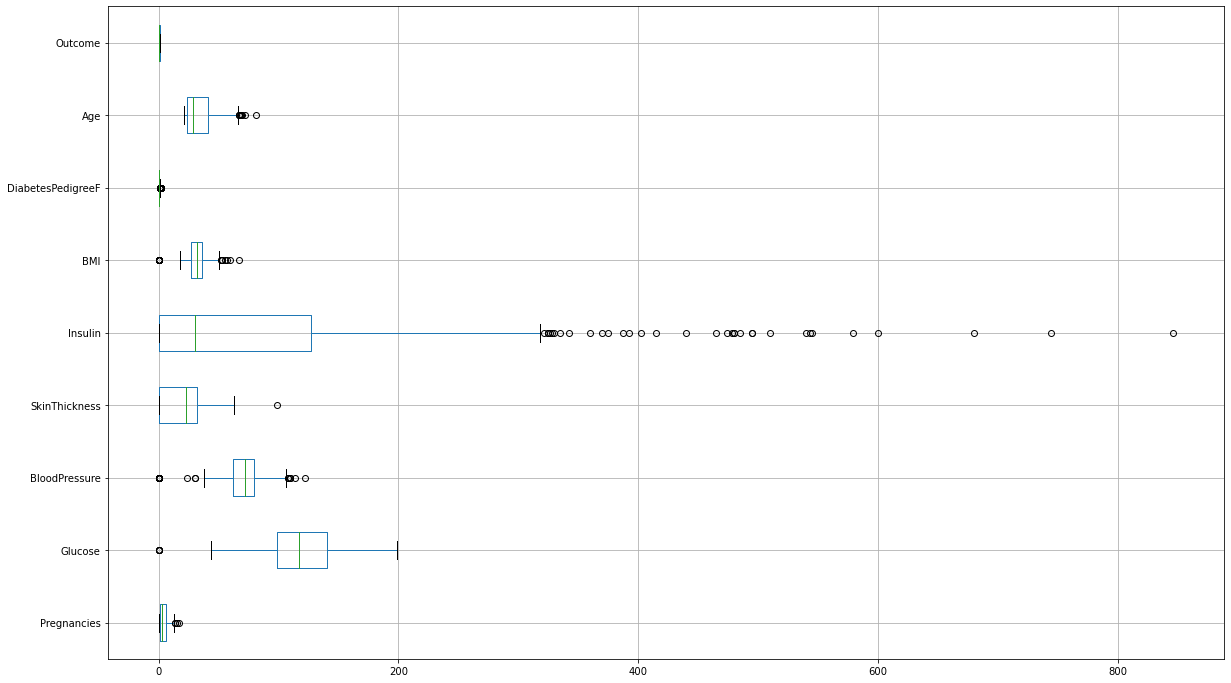

In [ ]:
plt.figure(figsize = (20,12))
df.boxplot(vert = False)

In [ ]:
#Remove the outliers
def remove_outlier(col):
    q1,q3 = np.percentile(col, [25,75])
    IQR = q3 - q1
    LW = q1 - (1.5*IQR)
    UW = q3 + (1.5*IQR)
    return LW, UW

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
for column in df.drop(['Outcome'], axis = 1).columns:
    LW, UW = remove_outlier(df[column])
    df[column] = np.where(df[column] > UW, UW, df[column])
    df[column] = np.where(df[column] < LW, LW, df[column])

<AxesSubplot:>

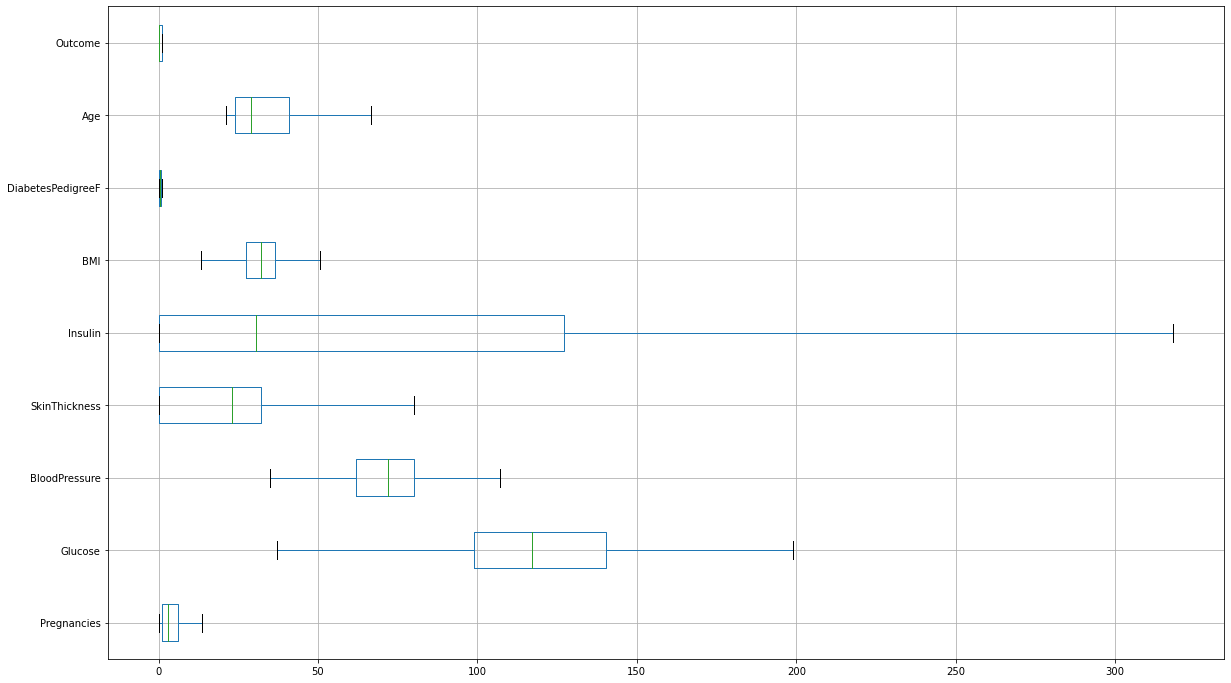

In [ ]:
df.boxplot(figsize = (20,12), vert = False)

## Train, Test, Split

In [ ]:
X = df.drop(['Outcome'], axis = 1) #Independent variable
y = df['Outcome'] #Target Variable

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 40)

In [ ]:
X_train.shape

(537, 8)

In [ ]:
df.shape

(768, 9)

In [ ]:
0.7*768

537.5999999999999

In [ ]:
X_test.shape

(231, 8)

In [ ]:
0.3*768

230.39999999999998

## Model Building
- steps:
- 1) Object Creation
- 2) Model fitting
- 3) Model Prediction
- 4) Model Evaluation

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#step1- object creation
model = LogisticRegression()

In [ ]:
#step 2 - model fitting
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#step 3: model prediction
y_pred = model.predict(X_test)

In [ ]:
#Step4: - Model Evaluation
from sklearn.metrics import accuracy_score,r2_score

In [ ]:
accuracy_score(y_test, y_pred)

0.7359307359307359

In [ ]:
accuracy_score(y_pred, y_test)

0.7359307359307359

In [ ]:
##To increase the increase
# cross-validation types..